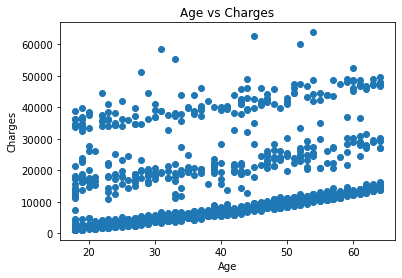

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Training Score: 0.884840389349575
Testing Score: 0.8718326610054818
Mean Squared Error: 19897816.797575068


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read the dataset
data = pd.read_csv(r"C:\Users\Hiremath\OneDrive\Desktop\insurance.csv")

# Perform exploratory data analysis (EDA)
# Visualize age vs charges
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

# Split the data into features (X) and target variable (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
model = RandomForestRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate and print the training and testing scores
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
